<div class="alert alert-info">
<b> Исследование о закономерностях определяющих успешность игр</b>
    
В нашем распоряжении данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
Цель:нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings

In [2]:
data=pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info">
<b> План по обзору данных</b>

1. Некорректное наименований колонок. Необходимо приведение к нижнему регистру.
2. Проверка на корректность типов данных.
3. Пропуски. Необходимо разобрать причину пропусков и исправить.
4. Дубликаты. Проверка на явные и неявные дубликаты.
5. Выбросы и аномалии.
    

In [5]:
data.columns = data.columns.str.lower() #приведем название столбцов в единый вид- к нижнему регистру

In [6]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
data_user_score_tbd=data.query('user_score=="tbd"')
print(data_user_score_tbd.head(10))

                                          name platform  year_of_release  \
119                              Zumba Fitness      Wii           2010.0   
301             Namco Museum: 50th Anniversary      PS2           2005.0   
520                            Zumba Fitness 2      Wii           2011.0   
645                               uDraw Studio      Wii           2010.0   
657   Frogger's Adventures: Temple of the Frog      GBA              NaN   
718                            Just Dance Kids      Wii           2010.0   
726                  Dance Dance Revolution X2      PS2           2009.0   
821                            The Incredibles      GBA           2004.0   
881              Who wants to be a millionaire       PC           1999.0   
1047                             Tetris Worlds      GBA           2001.0   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119       Sports      3.45      2.59      0.00         0.66           NaN   
301      

Предполагаем, что tbd  - это пропуск, незаполненное поле user_score. Вероятно, пользователь не дал никакую оценку. Заменим на пустое значение.

In [8]:
data['user_score'] = data['user_score'].replace('tbd',float('NaN'))

Заполним пропущенные поля по колонке year_of_release на 0. Вероятно, нет в датасете инфы по годам выпуска игр.

In [9]:
data['year_of_release'] = data['year_of_release'].fillna(0)

In [10]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Изменили формат у столбцов year_of_release,user_score так как первый относится к формату челочисленному значению, второй численное значение.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [12]:
print(data.isnull().sum()) #ищем пропуски в столбцах

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [13]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
name,0.0
platform,0.0
year_of_release,0.0
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0
critic_score,51.3
user_score,54.6


Из статистики по долям можно сделать вывод, что пропуски в столбцах critic_score,user_score,rating  имеют критически большую долю.Следует обработать данные пропуски

In [14]:
for t in data['platform'].unique():
    data.loc[(data['platform'] == t) & (data['critic_score'].isna()), 'critic_score'] = \
    data.loc[(data['platform'] == t), 'critic_score'].median() 
    warnings.filterwarnings("ignore")#заменим медианным значением

In [15]:
for t in data['platform'].unique():
    data.loc[(data['platform'] == t) & (data['user_score'].isna()), 'user_score'] = \
    data.loc[(data['platform'] == t), 'user_score'].median()
    warnings.filterwarnings("ignore")#заменим медианным значением

In [16]:
print(data.isnull().sum()) #проверим кол-во пропуском

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1120
user_score         1120
rating             6766
dtype: int64


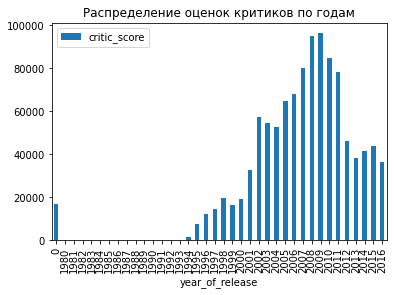

In [17]:
data_critic_score=(
    data
    .pivot_table(index='year_of_release',values='critic_score',aggfunc='sum')
    .plot(kind='bar',title='Распределение оценок критиков по годам')
)

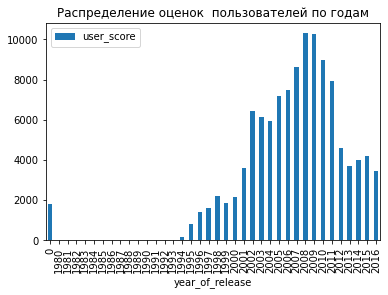

In [18]:
data_user_score=(
    data
    .pivot_table(index='year_of_release',values='user_score',aggfunc='sum')
    .plot(kind='bar',title='Распределение оценок  пользователей по годам')
)

critic_score и user_score начали вести с 1994 года, до этого периода рейтинг не производился.
Соответственно, оставшиеся пропуски в данных столбцах логичны и не требуют заполнений.


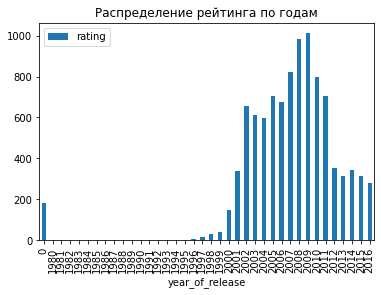

In [19]:
data_rating=(
    data
    .pivot_table(index='year_of_release',values='rating',aggfunc='count')
    .plot(kind='bar',title='Распределение рейтинга по годам')
)

In [20]:
data['rating'] = data['rating'].fillna('nan')

Заменили пропуски рейтинга на "заглушку"-Nan.
Здесь не можем установить какое то значение общее для заполнения,
оставляем пропуски


In [21]:
print(data.isnull().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1120
user_score         1120
rating                0
dtype: int64


In [22]:
duplicate_data=data.duplicated().sum()
print(duplicate_data) #Выведим на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их. 

0


In [23]:
 # просматриваем уникальные значения наименований платформ
display(data['platform'].unique())
display(data['platform'].nunique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

31


<div class="alert alert-info">
    Проверка наименований платформ на неявные дубликаты показала, что таковых не имеется. Все наименования уникальны

In [24]:
 # просматриваем уникальные значения наименований жанров
display(data['genre'].unique())
display(data['genre'].nunique())



array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

12

<div class="alert alert-info">
    Проверка наименований платформ на неявные дубликаты показала, что таковых не имеется. Все наименования уникальны

In [25]:
 # просматриваем уникальные значения года
display(data['year_of_release'].unique())

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

<div class="alert alert-info">
    Проверка  на неявные дубликаты показала, что таковых не имеется. Все наименования уникальны

In [26]:
display(data['critic_score'].unique())
display(data['user_score'].unique())

array([76. ,  nan, 82. , 80. , 89. , 58. , 87. , 66. , 91. , 61. , 97. ,
       95. , 77. , 69. , 88. , 73. , 68. , 83. , 94. , 93. , 85. , 86. ,
       98. , 96. , 90. , 84. , 74. , 78. , 92. , 71. , 72. , 62. , 65. ,
       73.5, 49. , 70. , 67. , 81. , 56. , 79. , 59. , 64. , 75. , 60. ,
       63. , 50. , 25. , 42. , 44. , 55. , 48. , 57. , 29. , 47. , 54. ,
       20. , 53. , 37. , 38. , 33. , 52. , 30. , 32. , 43. , 45. , 51. ,
       40. , 46. , 39. , 34. , 35. , 41. , 36. , 28. , 31. , 27. , 26. ,
       19. , 23. , 24. , 21. , 17. , 22. , 13. ])

array([8.  ,  nan, 8.3 , 8.5 , 6.6 , 8.4 , 7.4 , 8.6 , 7.7 , 6.3 , 8.2 ,
       9.  , 7.9 , 8.1 , 8.7 , 7.1 , 3.4 , 7.  , 5.3 , 4.8 , 3.2 , 8.9 ,
       6.4 , 7.8 , 7.5 , 2.6 , 7.2 , 9.2 , 7.3 , 4.3 , 7.6 , 7.15, 5.7 ,
       5.  , 9.1 , 6.8 , 6.5 , 7.95, 8.8 , 6.9 , 9.4 , 6.1 , 6.7 , 5.4 ,
       4.  , 4.9 , 4.5 , 9.3 , 6.2 , 4.2 , 6.  , 3.7 , 4.1 , 5.8 , 5.6 ,
       5.5 , 4.4 , 4.6 , 5.9 , 3.9 , 3.1 , 2.9 , 5.2 , 3.3 , 4.7 , 5.1 ,
       3.5 , 2.5 , 1.9 , 3.  , 2.7 , 2.2 , 2.  , 9.5 , 2.1 , 3.6 , 2.8 ,
       1.8 , 3.8 , 0.  , 1.6 , 9.6 , 2.4 , 1.7 , 1.1 , 0.3 , 1.5 , 0.7 ,
       1.2 , 2.3 , 0.5 , 1.3 , 0.2 , 0.6 , 1.4 , 0.9 , 1.  , 9.7 ])

<div class="alert alert-info">
    Проверка  на неявные дубликаты показала, что таковых не имеется. Все наименования уникальны

In [27]:
display(data['rating'].unique())


array(['E', 'nan', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)


<div class="alert alert-info">
    Согласно источнику http://psxplanet.ru/ESRB
рейтинг К-А является устаревшим и теперь игры с данным рейтингом можно отнести к Е

In [28]:
data['rating'] = data['rating'].replace('K-A','E')
data['rating'].value_counts() #произведем замену

nan     6766
E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

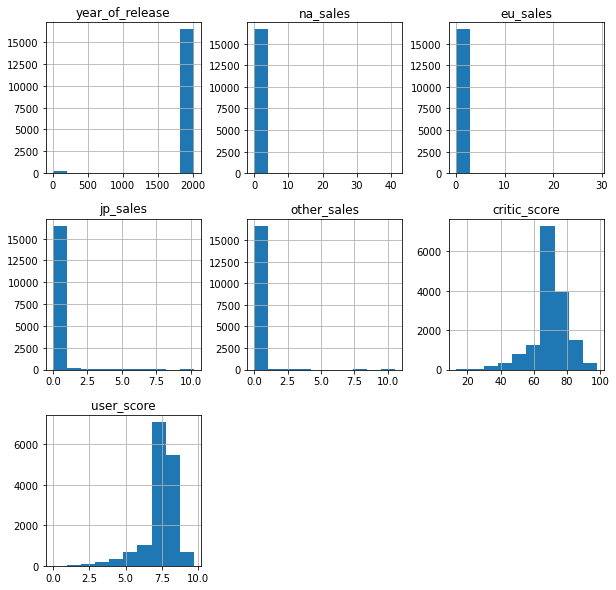

In [29]:
data.hist(figsize=(10, 10)); #проверим данные на выбросы и аномалии

<div class="alert alert-info">
    На гистограммах с продажами есть большое кол-во значений приближенных к нулю. По факту, это не является аномалией или выбросом, поскольку в колонках представлены продажи по конкретным регионам, а это значит, что продаж в конкретном регионе по данной игре могло и не быть.

<div class="alert alert-info">
<b> Вывод по обзору данных</b>

1. Некорректное наименований колонок. Привели наименование колонок к нижнему регистру.
2. Исправлены типы данных столбцов year_of_release,user_score.
3. Пропуски. Разобрали причины пропусков и исправили там где возможно. user_score, critic_score
4. Дубликаты. Проверка на явные и неявные дубликаты. Явные дубликаты-строки отсуствуют. Заменили устаревший вид рейтинга К-А на Е.
5. Выбросы и аномалии. Не наблюдаем.
    

In [30]:
data['all_sales'] = data['other_sales'] + data['eu_sales'] + data['jp_sales']+ data['na_sales'] #создадим столбец с суммарные продажи во всех регионах 

In [31]:
data_grouped_year=(
    data
    .pivot_table(index='year_of_release',values='name',aggfunc='count')
    .sort_values(by='name',ascending=False)
)
display(data_grouped_year)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


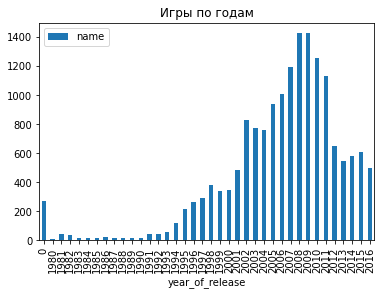

In [32]:
data_grouped_year=(
    data
    .pivot_table(index='year_of_release',values='name',aggfunc='count')
    .plot(kind='bar',title='Игры по годам')
)

Особый пик выпуска игр пришелся на 2008-2010 годы - более 1400 игр.Рост производительности игр начался с 1994 года. До этого периода (1994г) кол-во игр было очень низким.

<b>Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?<b>

In [33]:
data_grouped_platform=(
    data
    .pivot_table(index=['platform'],values='all_sales',aggfunc='sum')
    .sort_values(by='all_sales',ascending=False)    
)
display(data_grouped_platform)

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [34]:
top_5_platforms=['PS2','X360','PS3','Wii','DS']

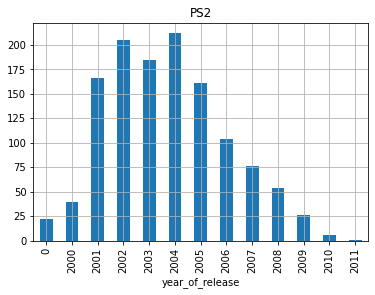

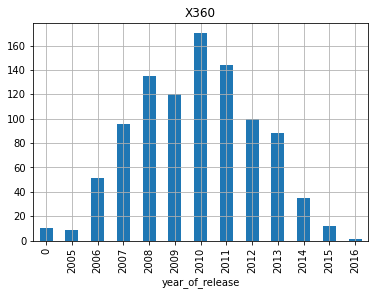

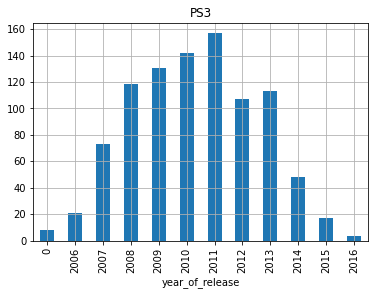

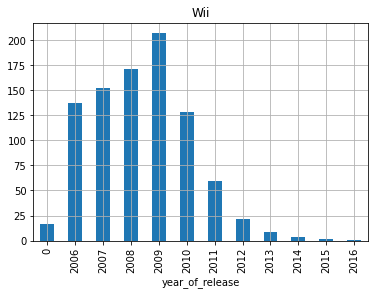

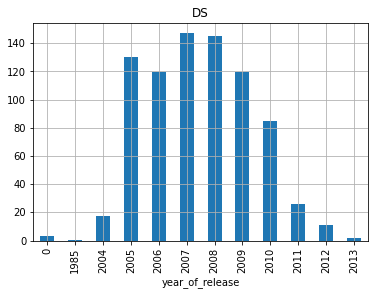

In [35]:
for platform in top_5_platforms:
    data[data['platform']==platform].groupby('year_of_release')['all_sales'].sum().plot(kind='bar',grid=True)
    plt.title(platform)
    plt.show()


Были выделены топ 5 платформ с самыми высокими продажами. Построены графики распределения продаж по годам по каждой платформе. Можно сделать вывод:
1. c 2000 года первые большие продажи у PS2
2. С 2005 на рынок выходит DS с крупными продажами
3. После 2006 продажи PS2 идут на спад, вероятно, PS3 выходит на рынок  и с 2006 активно конкурирует с DS,Wii,x360 

<div class="alert alert-info">
    Средний срок жизни выше обозначенных платформ 9-10 лет.

<b>Возьмем данные за соответствующий актуальный период. 
Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.<b>

In [36]:
data_actual_period=data.query('year_of_release>=2012')

In [37]:
data_actual_period_grouped_platform=(
    data_actual_period
    .pivot_table(index=['platform','year_of_release'],values='all_sales',aggfunc='sum')
    .sort_values(by='all_sales',ascending=False)    
)
display(data_actual_period_grouped_platform)

all_sales
platform year_of_release           
PS4      2015                118.90
PS3      2013                113.25
         2012                107.36
PS4      2014                100.00
X360     2012                 99.74
         2013                 88.58
PS4      2016                 69.25
XOne     2015                 60.14
3DS      2013                 56.57
XOne     2014                 54.07
3DS      2012                 51.36
PS3      2014                 47.76
3DS      2014                 43.76
X360     2014                 34.74
3DS      2015                 27.78
XOne     2016                 26.15
PS4      2013                 25.99
PC       2012                 23.22
WiiU     2014                 22.03
Wii      2012                 21.71
WiiU     2013                 21.65
XOne     2013                 18.96
WiiU     2012                 17.56
PS3      2015                 16.82
WiiU     2015                 16.35
PSV      2012                 16.19
3DS      2016                 15.14
PC       2014                 13.28
         2013                 12.38
X360     2015                 11.96
PSV      2014                 11.90
DS       2012                 11.01
PSV      2013                 10.59
Wii      2013                  8.59
PC       2015                  8.52
PSP      2012                  7.69
PSV      2015                  6.25
PC       2016                  5.25
WiiU     2016                  4.60
PSV      2016                  4.25
Wii      2014                  3.75
PS3      2016                  3.60
PSP      2013                  3.14
DS       2013                  1.54
X360     2016                  1.52
Wii      2015                  1.14
PSP      2014                  0.24
Wii      2016                  0.18
PSP      2015                  0.12

In [38]:
actual_period_platform=['PS4','PS3','X360','3DS','XOne','WiiU','PC','PSV','Wii','DS','PSP']

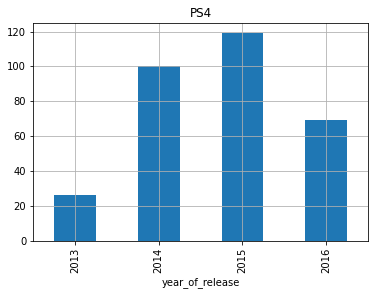

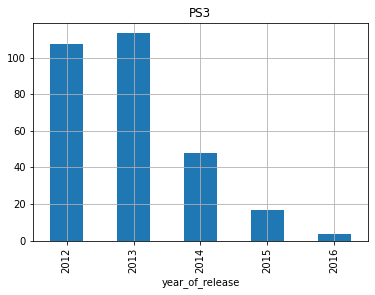

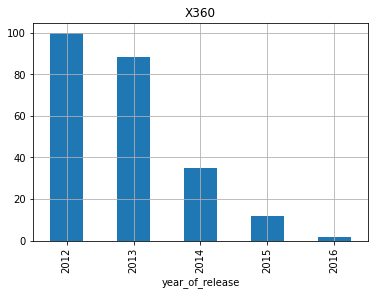

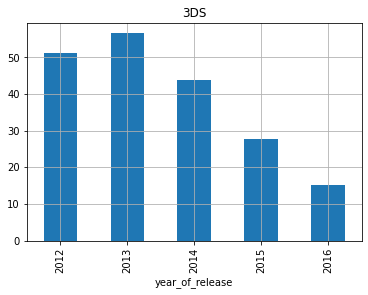

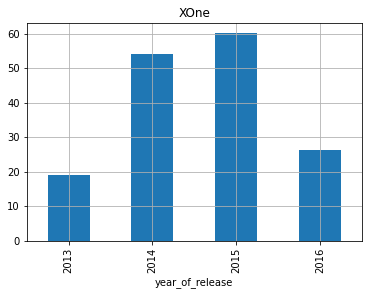

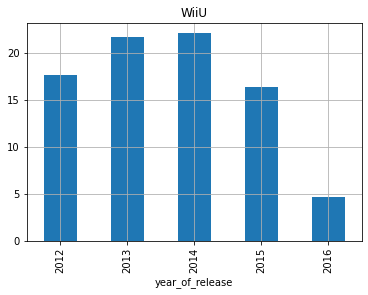

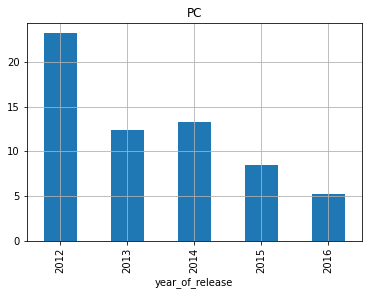

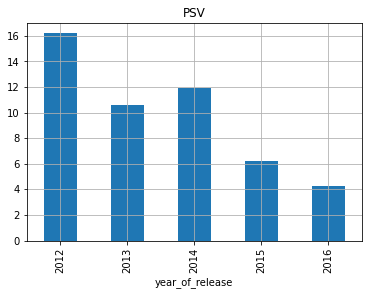

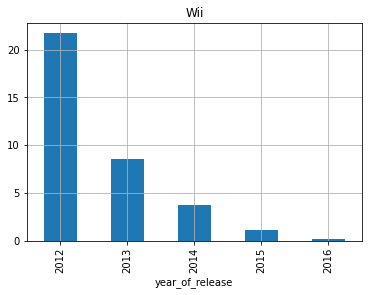

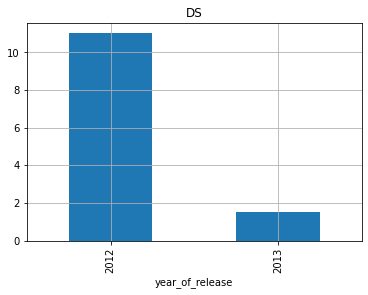

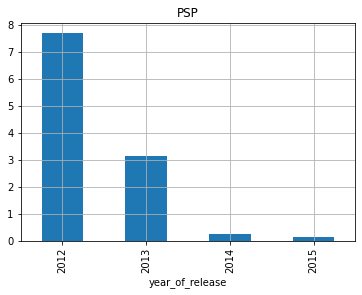

In [39]:
for platform in actual_period_platform:
    data_actual_period[data_actual_period['platform']==platform].groupby('year_of_release')['all_sales'].sum().plot(kind='bar',grid=True)
    plt.title(platform)
    plt.show()


Наиболее привлекательной платформой с точки зрения прибыли является PS4. Самые высокие продажи у данной платформы. При этом если сравнить статсистику продаж по данной платформе то наблюдаем спад продаж относительно 2015 гола почти в 2 раза.
Аутсайдеры по критерию продаж являеются  Wii и PSP.

<b>Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. <b>

Text(0, 0.5, 'Глобальные продажи')

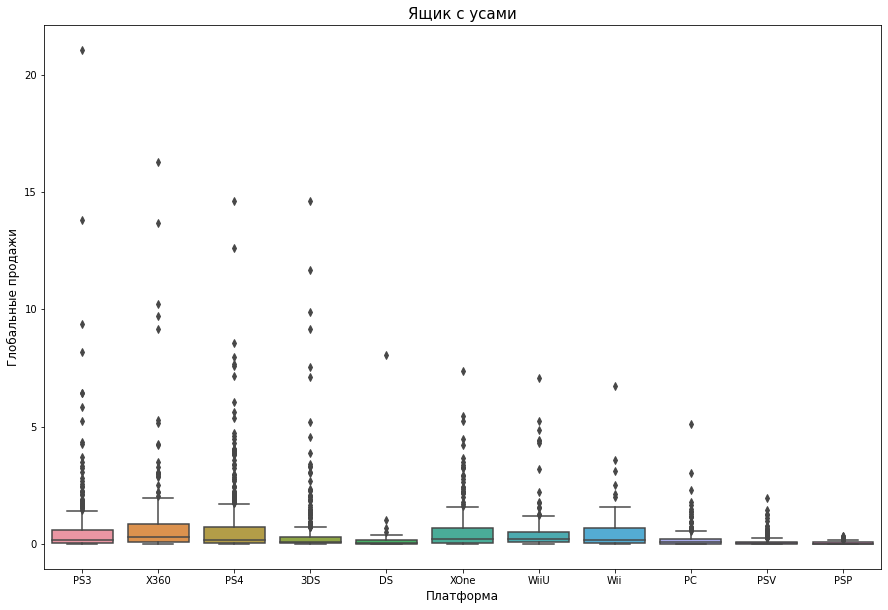

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_actual_period,x='platform',y='all_sales')
plt.title('Ящик с усами',fontsize=15)
plt.xlabel('Платформа',fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

In [41]:
data_actual_period.groupby('platform')['all_sales'].describe()  #описательная статистика

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


(-1.0, 3.0)

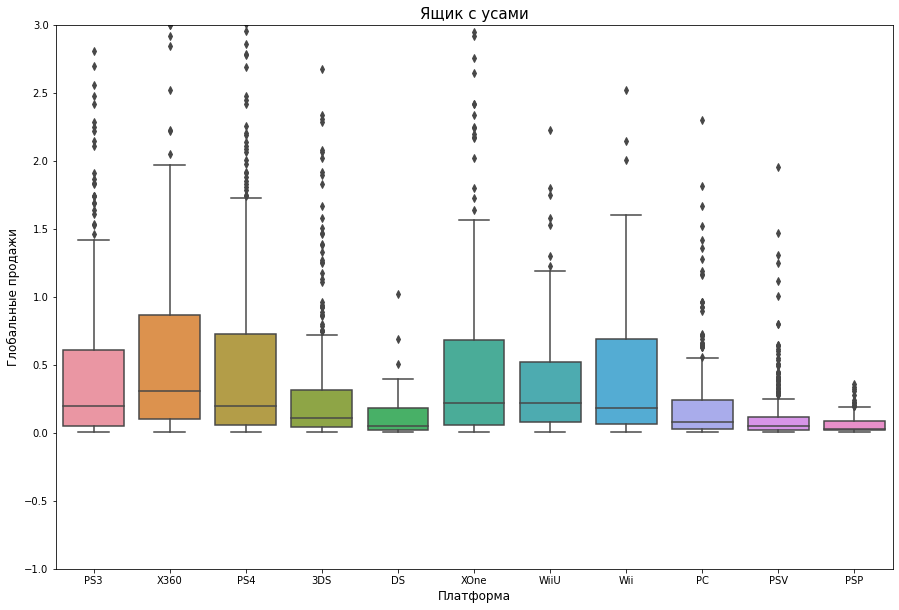

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data_actual_period,x='platform',y='all_sales')
plt.title('Ящик с усами',fontsize=15)
plt.xlabel('Платформа',fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(-1,3)

Вывод по графику следующий:
1.  у PS3,x360,ps4,3ds визуализируются большие выбросы данных. что свидетельствует о  резких спадах/росте продаж.
    Действительно, на примере PS3 видим резкий спад продаж (в 2013г - продажи более 100, 2016 - приближены к 0 )
2. DS - так как в анализе присутствуют только данные за два года, то наблюдаем короткий "ящик" и маленький "ус"


<div class="alert alert-info">
    Дополняю вывод следующим:
    Нижняя часть boxplot-ов и описательная статистика позволяет сделать вывод, что медианы всех указанных платформ примерно на одном уровне - 0. Только PS4 и x360 более 0.80. 
    Также стоит отметить, что выбросы имеют различия. Есть частые выбросы ( где, большая концентрация черных точек). Есть выбросы редкие (например, PS3). Данная категория выбросов свидетельствует о резком росте продаж.
    

<b>Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. <b>

In [43]:
data_actual_period_PS4=data_actual_period.query('platform=="PS4"')

<AxesSubplot:>

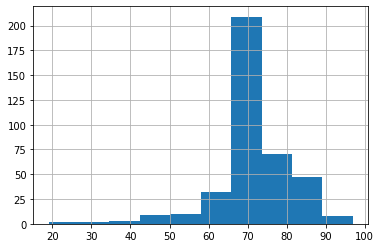

In [44]:
data_actual_period_PS4['critic_score'].describe()
data_actual_period_PS4['critic_score'].hist()

<AxesSubplot:>

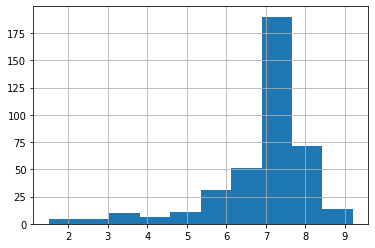

In [45]:
data_actual_period_PS4['user_score'].describe()
data_actual_period_PS4['user_score'].hist()

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

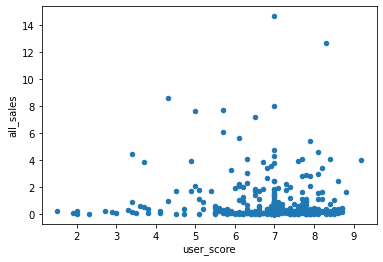

In [46]:
data_actual_period_PS4.plot(x='user_score', y='all_sales', kind='scatter') 

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

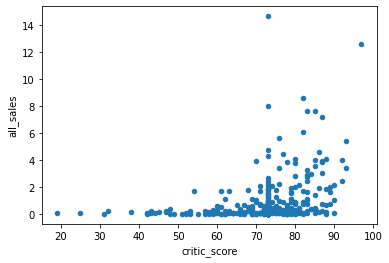

In [47]:
data_actual_period_PS4.plot(x='critic_score', y='all_sales', kind='scatter') 

In [48]:
print(data_actual_period_PS4['all_sales'].corr(data_actual_period_PS4['user_score']))

-0.039153543162937114


Значение близко к нулю, значит, линейная связь слабая либо отсутствует вовсе

In [49]:
print(data_actual_period_PS4['all_sales'].corr(data_actual_period_PS4['critic_score']))

0.32534576345022587


Корреляция говорит о наличии связи, однако не слишком сильной.

<b>Соотнесем выводы с продажами игр на других платформах.<b>

0.28544104680505517
-0.055416474013406325


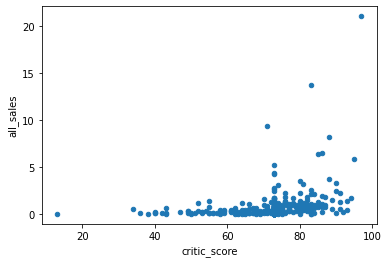

In [50]:
data_actual_period_PS3=data_actual_period.query('platform=="PS3"')
data_actual_period_PS3.plot(x='critic_score', y='all_sales', kind='scatter') 
print(data_actual_period_PS3['all_sales'].corr(data_actual_period_PS3['critic_score']))
print(data_actual_period_PS3['all_sales'].corr(data_actual_period_PS3['user_score']))

Корреляция между оценкой критиков и продажами присутствует но достаточно слабая
Корреляция между оценкой пользователей и продажами близка к нулю т.е отсутствует

0.07456971551768414
-0.04705147546914623


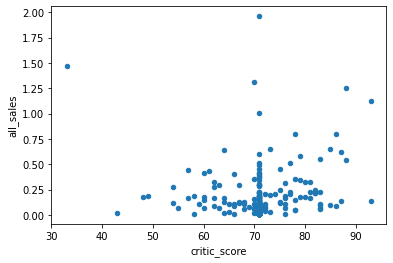

In [51]:
data_actual_period_PSV=data_actual_period.query('platform=="PSV"')
data_actual_period_PSV.plot(x='critic_score', y='all_sales', kind='scatter') 
print(data_actual_period_PSV['all_sales'].corr(data_actual_period_PSV['critic_score']))
print(data_actual_period_PSV['all_sales'].corr(data_actual_period_PSV['user_score']))

Корреляция между оценкой критиков и продажами близка к нулю т.е отсутствует.
Корреляция между оценкой пользователей и продажами близка к нулю т.е отсутствует

0.1879015616676559
0.10365596474421178


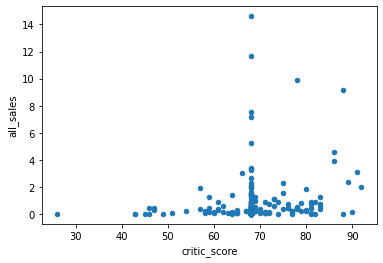

In [52]:
data_actual_period_3DS=data_actual_period.query('platform=="3DS"')
data_actual_period_3DS.plot(x='critic_score', y='all_sales', kind='scatter') 
print(data_actual_period_3DS['all_sales'].corr(data_actual_period_3DS['critic_score']))
print(data_actual_period_3DS['all_sales'].corr(data_actual_period_3DS['user_score']))

Корреляция между оценкой критиков и продажами близка к нулю т.е отсутствует.
Корреляция между оценкой пользователей и продажами близка к нулю т.е отсутствует

0.32704402689279016
-0.01816547120946419


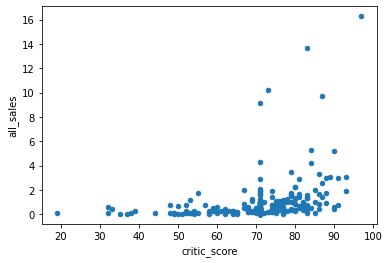

In [53]:
data_actual_period_X360=data_actual_period.query('platform=="X360"')
data_actual_period_X360.plot(x='critic_score', y='all_sales', kind='scatter') 
print(data_actual_period_X360['all_sales'].corr(data_actual_period_X360['critic_score']))
print(data_actual_period_X360['all_sales'].corr(data_actual_period_X360['user_score']))

Корреляция между оценкой критиков и продажами присутствует но достаточно слабая.
Корреляция между оценкой пользователей и продажами близка к нулю т.е отсутствует

<b>Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?<b>

In [54]:
data_actual_period['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

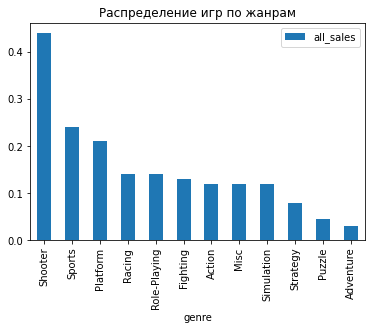

In [55]:
data_actual_period_genre_sales=(
    data_actual_period
    .pivot_table(index='genre',values='all_sales',aggfunc='median')
    .sort_values(by='all_sales',ascending=False) 
    .plot(kind='bar',title='Распределение игр по жанрам')
)
#посмотрим распределение игр по жанрам (median)

Самые продаваемые жанры игр топ3:
1. Shooter
2. Sports
3. Platform


Низкие - у жанра Puzzle и Adventure


<b>Шаг 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишем различия в долях продаж.
Самые популярные жанры (топ-5). 
Влияет ли рейтинг ESRB на продажи в отдельном регионе?<b>


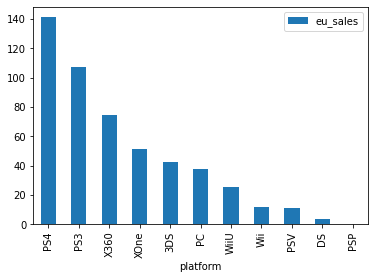

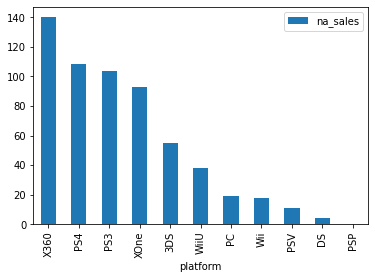

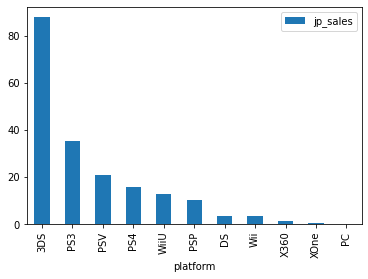

In [56]:
regions =['eu_sales', 'na_sales', 'jp_sales']
for region in regions:
    (
    data_actual_period
    .pivot_table(index = 'platform', values = region, aggfunc = 'sum')
    .sort_values(by=region,ascending=False)
    .plot(kind = 'bar')
    )
    plt.show()


In [57]:
data_actual_period_pt_eu_sales=data_actual_period.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
data_actual_period_pt_eu_sales['percent'] = (data_actual_period_pt_eu_sales['eu_sales'] / data_actual_period_pt_eu_sales['eu_sales'].sum()) * 100
data_actual_period_pt_eu_sales['percent']=data_actual_period_pt_eu_sales['percent'].round( )
print(data_actual_period_pt_eu_sales)

          eu_sales  percent
platform                   
3DS          42.64      8.0
DS            3.53      1.0
PC           37.76      7.0
PS3         106.86     21.0
PS4         141.09     28.0
PSP           0.42      0.0
PSV          11.36      2.0
Wii          11.92      2.0
WiiU         25.13      5.0
X360         74.52     15.0
XOne         51.59     10.0


В Европе большую долю  продаж занимает PS4 - 28% PS3 - 21% X360 - 15%

Наименьшую долю занимает - PSP

In [58]:
data_actual_period_pt_na_sales=data_actual_period.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
data_actual_period_pt_na_sales['percent'] = (data_actual_period_pt_na_sales['na_sales'] / data_actual_period_pt_na_sales['na_sales'].sum()) * 100
data_actual_period_pt_na_sales['percent']=data_actual_period_pt_na_sales['percent'].round( )
print(data_actual_period_pt_na_sales)

          na_sales  percent
platform                   
3DS          55.31      9.0
DS            4.59      1.0
PC           19.12      3.0
PS3         103.38     17.0
PS4         108.74     18.0
PSP           0.13      0.0
PSV          10.98      2.0
Wii          17.45      3.0
WiiU         38.10      6.0
X360        140.05     24.0
XOne         93.12     16.0


В Северной Америке большую долю  продаж занимает X360 - 24% PS3 - 17% PS4 - 18%
Наименьшую долю занимает - PSP

In [59]:
data_actual_period_pt_jp_sales=data_actual_period.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
data_actual_period_pt_jp_sales['percent'] = (data_actual_period_pt_jp_sales['jp_sales'] / data_actual_period_pt_jp_sales['jp_sales'].sum()) * 100
data_actual_period_pt_jp_sales['percent']=data_actual_period_pt_jp_sales['percent'].round( )
print(data_actual_period_pt_jp_sales)

          jp_sales  percent
platform                   
3DS          87.79     46.0
DS            3.72      2.0
PC            0.00      0.0
PS3          35.29     18.0
PS4          15.96      8.0
PSP          10.47      5.0
PSV          21.04     11.0
Wii           3.39      2.0
WiiU         13.01      7.0
X360          1.57      1.0
XOne          0.34      0.0


В Японии большую долю  продаж занимает 3DS - 46% PS3 - 18% PSV - 11%
Наименьшую долю занимает - PC,Xone

In [60]:
top_5_platform=['PS3','PS4','PSV','3DS','X360']

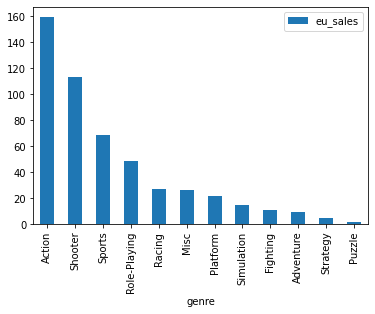

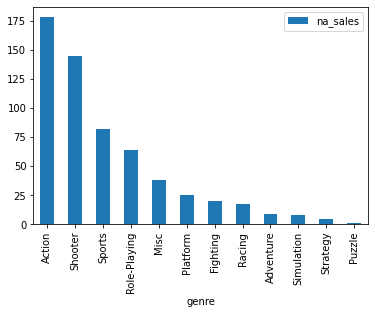

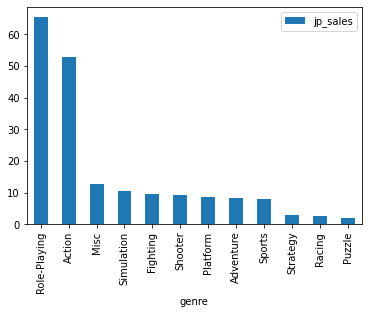

In [61]:
regions =['eu_sales', 'na_sales', 'jp_sales']
for region in regions:
    (
    data_actual_period
    .pivot_table(index = 'genre', values = region, aggfunc = 'sum')
    .sort_values(by=region,ascending=False)
    .plot(kind = 'bar')
    )
    plt.show()

В Европе и Северной Америке топ3 жанра - 
Action,Shooters,Sports
В Японии - 
Role-Playing,Action,Misc

Посмотрим влияет ли рейтинг на продажи в отдельном регионе

<AxesSubplot:xlabel='eu_sales', ylabel='rating'>

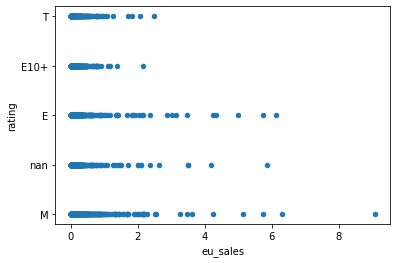

In [62]:
data_actual_period.plot(x='eu_sales', y='rating', kind='scatter') 

<AxesSubplot:xlabel='na_sales', ylabel='rating'>

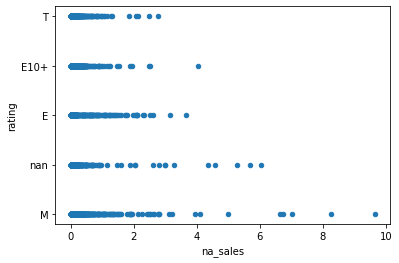

In [63]:
data_actual_period.plot(x='na_sales', y='rating', kind='scatter') 

<AxesSubplot:xlabel='jp_sales', ylabel='rating'>

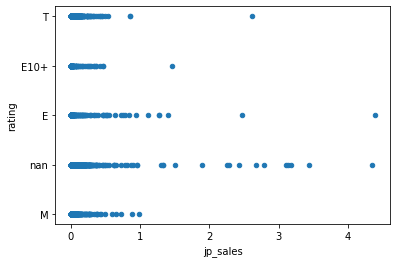

In [64]:
data_actual_period.plot(x='jp_sales', y='rating', kind='scatter') 

Продажи игр с рейтингом Е и М имеют более высокие показатели в Северной Америке и Европе. При этом в Японии рейтинг М не пользуется популярностью, предпочтения отдается рейтингу Е(everyone). Для всех регионов общее - низкие показатели продаж по категории Е10+.


<b>Шаг 5. Проверим гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<b>

In [65]:

xone_user = data_actual_period[(data_actual_period['platform'] =='XOne') & (data_actual_period['user_score'] > 0)]['user_score']
pc_user =data_actual_period[(data_actual_period['platform'] =='PC') & (data_actual_period['user_score'] > 0)]['user_score']

alpha = 0.05 

results = st.ttest_ind(xone_user, pc_user, equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.8570492519273201
Не получилось отвергнуть нулевую гипотезу


1. Н0 -  гипотеза о равенстве рейтингов платформ Xbox One и PC.
2. H1 - неравенство рейтингов платформ Xbox One и PC.
3. Принимаем нулевую гипотезу. Предположение, что пользовательские рейтинги платформ Xbox One и PC одинаковые высоко вероятны. Значение p-value показывает: вероятность случайно получить такое среднее.В качестве критерия использован критерий T критерий Стюдента. Метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var).Все условия для использования метода соблюдены (Генеральные совокупности не должны зависеть друг от друга,Выборочные средние должны быть нормально распределены.)


In [66]:
Action_user = data_actual_period[(data_actual_period['genre'] =='Action')& (data_actual_period['user_score'] > 0)]['user_score']
Sports_user =data_actual_period[(data_actual_period['genre'] =='Sports')& (data_actual_period['user_score'] > 0)]['user_score']

alpha = 0.05 

results = st.ttest_ind(Action_user, Sports_user, equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

3.559550624245508e-21
Отвергаем нулевую гипотезу


1. Н0 - гипотеза о равенстве рейтингов  жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).
2. H1 - гипотеза о неравенстве рейтингов  жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).
3. Отвергаем нулевую гипотезу. Предположение, что пользовательские рейтинги  жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)разные оказалось верным. Значение p-value показывает: вероятность случайно получить такое среднее.В качестве критерия использован критерий T критерий Стюдента. Метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var).Все условия для использования метода соблюдены (Генеральные совокупности не должны зависеть друг от друга,Выборочные средние должны быть нормально распределены.)

<b>Шаг 6.Общий вывод<b>

В ходе решения задачи были выявлены закономерности определяющие успешность игры. Это позволило сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В ходе предобработки данных были выявлены:
1. Исправление наименований колонок. Приведение к нижнему регистру.
2. Пропуски. Были проделаны операции по заменен пустот средними показателями (user_score,critic_score),а также замены пустот на нули и Nan.
3. Дубликаты. Объеденены рейтинги K-A и Е.
4. Изменение типов данных.
 

В ходе  исследовательского анализа данных было выявлено:

1. В датасете период 1980-2016гг
2. Не весь период необходим для анализа (брали последние 5 лет)
3. Особый пик выпуска игр пришелся на 2008-2010 годы - более 1400 игр.
4. Рост производительности игр начался с 1994 года. До этого периода (1994г) кол-во игр было очень низким.
5. Наиболее привлекательной платформой с точки зрения прибыли является PS4.
6. Аутсайдеры по критерию продаж являеются Wii и PSP.
5. Корреляция между оценкой критиков и продажами присутствует но достаточно слабая.
6. Корреляция между оценкой пользователей и продажами близка к нулю т.е отсутствует.

В ходе  составления портрета пользвателя каждого региона было выявлено:

1. Самые продаваемые жанры Action,Sport,Shooter,Sports,Role-Playing
2. Cамый непопулярный жанр- Puzzle
3. Выделены топ 5 платформ в регионах Северная Америка, Европа и Япония['PS3','PS4','PSV','3DS','X360']
4. Самые популярные жанры в Европе и Северной Америке Action,Shooters,Sports В Японии - Role-Playing,Action,Misc
5. Продажи игр с рейтингом Е и М имеют более высокие показатели в Северной Америке и Европе. При этом в Японии рейтинг М не пользуется популярностью, предпочтения отдается рейтингу Е(everyone). Для всех регионов общее - низкие показатели продаж по категории Е10+.

В ходе  проверки гипотез было выявлено:

1. Предположение, что пользовательские рейтинги платформ Xbox One и PC одинаковые высоко вероятны. Принята нулевая гипотеза.
2.  Предположение, что пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)разные оказалось верным.Отвергаем нулевую гипотезу.


